In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 500)

In [57]:
train_df = pd.read_csv("/Users/xiechenwei/Desktop/数据挖掘结果/train_wity_kmeans.csv", parse_dates=['timestamp'])
train_df['price_doc_log'] = np.log1p(train_df['price_doc'])

In [58]:
train_df

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

[<matplotlib.text.Text at 0x148a62f28>, <matplotlib.text.Text at 0x148bb5d30>]

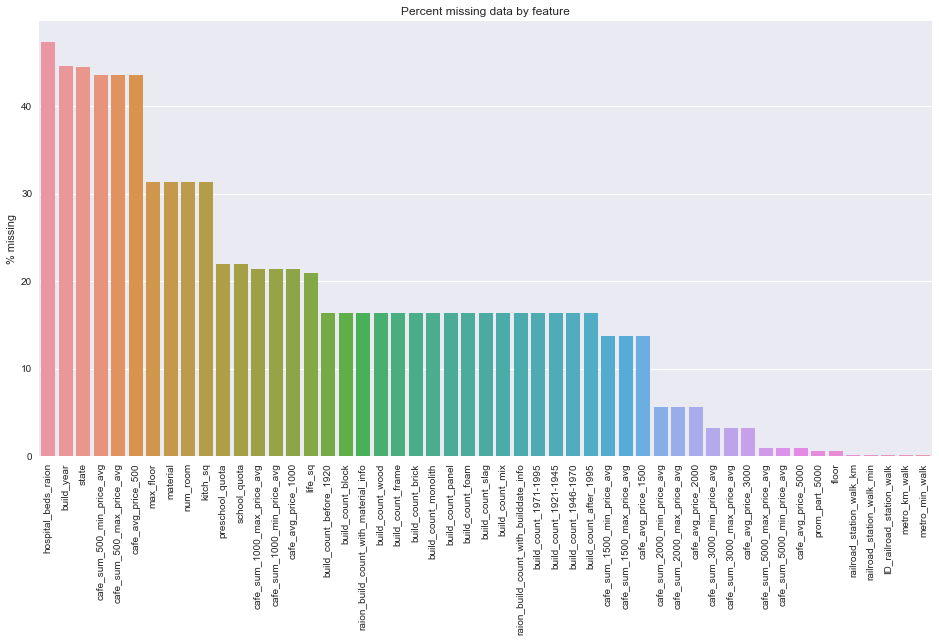

In [62]:

train_na = (train_df.isnull().sum() / len(train_df)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(16, 8))
plt.xticks(rotation='90')
sns.barplot(x=train_na.index, y=train_na)
ax.set(title='Percent missing data by feature', ylabel='% missing')

In [12]:
train_df['floor_from_top'] =  train_df['max_floor'] - train_df['floor']
train_df['lat_lon'] = train_df['lat'] * train_df['lon']
train_df['ave_price'] = train_df['price_doc'] / train_df['full_sq']

train_df['month'] = train_df.timestamp.dt.month
train_df['season'] = train_df['month'] / 4 + 1

train_df['edu_ratio'] = train_df['preschool_education_centers_raion'] / train_df['school_education_centers_raion']

train_df['school_ratio'] = train_df['children_school'] / train_df['school_quota'].astype(float)

train_df['room_ratio'] = train_df['full_sq'] / train_df['num_room'].astype(float)
train_df['rel_floor'] = train_df['floor'] / train_df['max_floor'].astype(float)
train_df['rel_kitch_sq'] = train_df['kitch_sq'] / train_df['full_sq'].astype(float)

In [25]:
train_df.iloc[0].index[1:11]

Index(['timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material',
       'build_year', 'num_room', 'kitch_sq', 'state'],
      dtype='object')

In [63]:
#internal_chars = train_df.iloc[0].index[1:10]
#print(train_df.iloc[0].index[291])
#internal_chars.append(train_df.iloc[0].index[291])
internal_chars = ['hospital_beds_raion', 'lat', 'lon', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq'
                 ,'price_doc']
corrmat = train_df[internal_chars].corr()

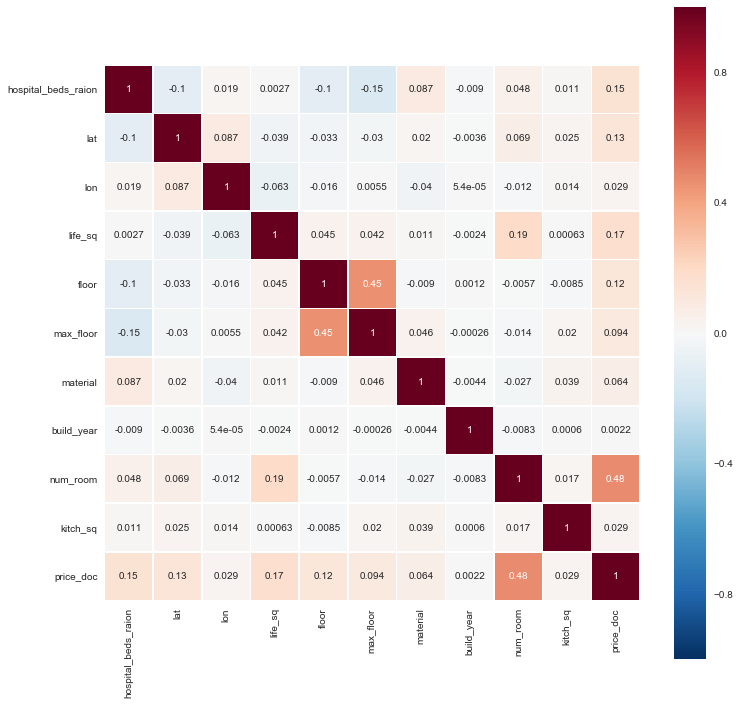

In [64]:
f, ax = plt.subplots(figsize=(12, 12))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)


#微观数据中，特征的相关性分析：
相关性小的：
    'buiid_year',
    'kitch_sq',
    'green_zone_part',
    'indust_part',
    'preschool_quota',
    'school_quota',
    'additional_education_raion',
    'full_all',
    'male_f',
    'female_f',
    '16_29_all',
    '16_29_male',
    '16_29_female',
    'raion_build_count_with_material_info',
    'build_count_block',
    'build_count_frame',
    'build_count_panel'
    'build_count_foam',
    'build_count_slag',
    'build_count_mix',
    'raion_build_count_with_builddate_info',
    'build_count_1946-1970', 
    'build_count_1971-1995',
     'build_count_after_1995', 
     'ID_metro',
    'green_zone_km', 
    'industrial_km', 
    'water_treatment_km',
       'cemetery_km', 
       'incineration_km',
       'ID_railroad_station_walk',
       'ID_railroad_station_avto',
       'water_km',
       'mkad_km',
       'ID_big_road1',
       'ID_bus_terminal',
       'big_market_km',
       'green_part_500',
       'prom_part_500'
       trc_count_500', 
       'trc_sqm_500',
       'cafe_sum_500_max_price_avg',
       'cafe_avg_price_500',
       'cafe_count_500_na_price',
       'cafe_count_500_price_high',
       'church_count_500', 'mosque_count_500',
       'market_count_500', 
       'green_part_1000',
       'prom_part_1000',
       'trc_sqm_1000',
       'cafe_count_1000_price_4000',
       'church_count_1000',
       'market_count_1000',
       'green_part_1500',
       'cafe_count_1500_price_4000',
       'big_church_count_1500',
       'prom_part_2000',
       'prom_part_3000',
       'cafe_sum_3000_min_price_avg',
       'cafe_sum_3000_max_price_avg', 
       'cafe_avg_price_3000',
       'prom_part_5000',
       'cafe_sum_5000_min_price_avg', 
       'cafe_sum_5000_max_price_avg',
       'cafe_avg_price_5000',
       'build_count_after_1995'

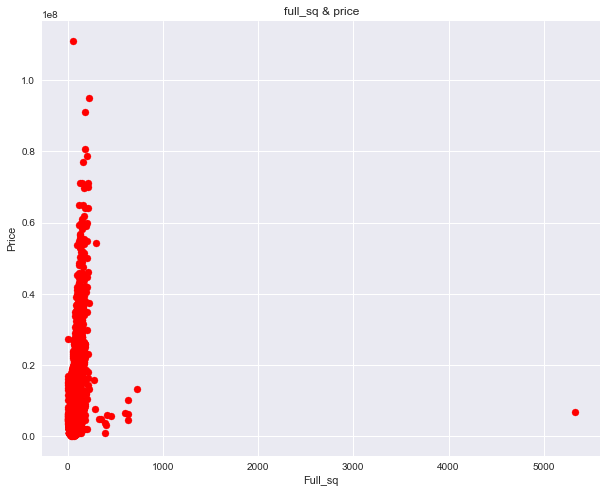

In [31]:
f, ax = plt.subplots(figsize=(10, 8))
plt.scatter(x=train_df['full_sq'], y=train_df['price_doc'], c='r')
ax.set(title='full_sq & price', xlabel='Full_sq', ylabel='Price')

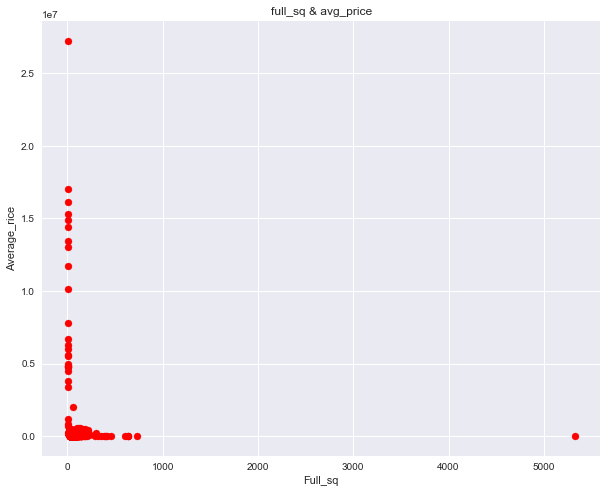

In [46]:
f, ax = plt.subplots(figsize=(10, 8))
plt.scatter(x=train_df['full_sq'], y=train_df['price_doc']/train_df['full_sq'], c='r')
ax.set(title='full_sq & avg_price', xlabel='Full_sq', ylabel='Average_rice')

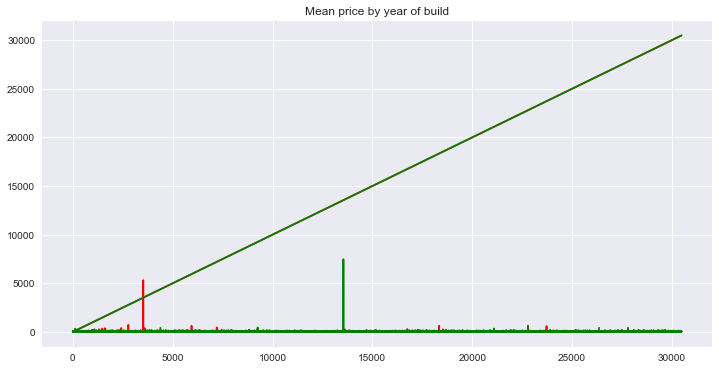

In [44]:
f, ax = plt.subplots(figsize=(12, 6))
t = train_df.groupby(train_df['id'])
plt.plot(t['id'],t['full_sq'], color='r')
plt.plot(t['id'],t['life_sq'], color='g')
ax.set(title='Mean price by year of build')